# Generating random data for leaning

In [1]:
import numpy as np
import random

data_train = [random.randint(1, 100) for _ in range(10000)]

len(data_train)

10000

In [2]:
data_train = np.array(data_train)
data_train = data_train.reshape(-1, 10)

data_train.shape

(1000, 10)

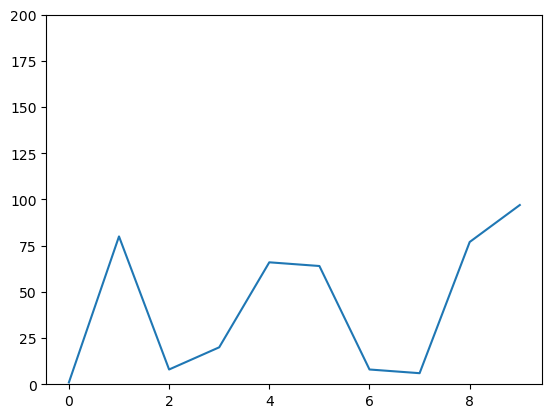

In [3]:
import matplotlib.pyplot as plt

plt.plot(data_train[0])
plt.ylim([0, 200])
plt.show()

# Generating random data for Testing

In [4]:
data_test_normal = [random.randint(1, 100) for _ in range(100)]
data_test_anomaly = [random.randint(100, 200) for _ in range(100)]

data_test_normal = np.array(data_test_normal)
data_test_anomaly = np.array(data_test_anomaly)

data_test = np.concatenate((data_test_normal, data_test_anomaly))
data_test = data_test.reshape(-1, 10)

data_test.shape

(20, 10)

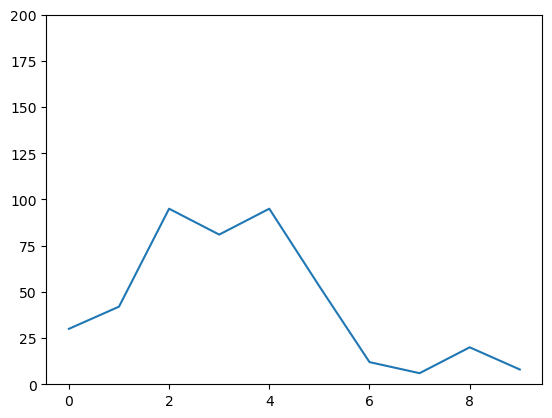

In [5]:
plt.plot(data_test[0])
plt.ylim([0, 200])
plt.show()

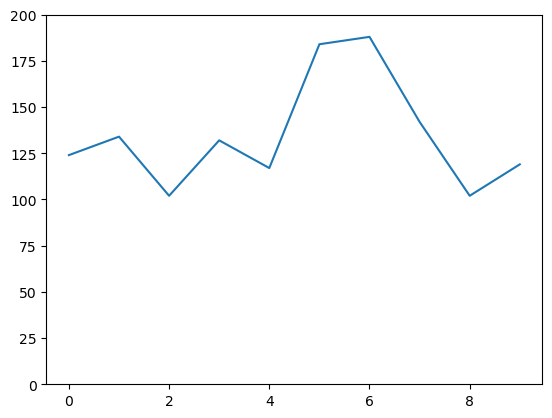

In [6]:
plt.plot(data_test[10])
plt.ylim([0, 200])
plt.show()

# Data Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

data_train.shape, data_test.shape

((1000, 10), (20, 10))

In [8]:
data_train = data_train.reshape(-1, 10, 1)
data_test = data_test.reshape(-1, 10, 1)

data_train.shape, data_test.shape

((1000, 10, 1), (20, 10, 1))

# Developing model

In [9]:
from keras.models import Sequential
from keras.layers import Input, Conv1D, Conv1DTranspose

model = Sequential()
model.add(Input(shape=(10, 1)))
model.add(Conv1D(filters=8, kernel_size=3, padding='same', strides=2, activation='relu'))
model.add(Conv1D(filters=4, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1DTranspose(filters=4, kernel_size=5, padding='same', strides=2, activation='relu'))
model.add(Conv1DTranspose(filters=1, kernel_size=5, padding='same'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 8)              32        
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 4)              100       
                                                                 
 conv1d_transpose (Conv1DTra  (None, 10, 4)            84        
 nspose)                                                         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 10, 1)            21        
 ranspose)                                                       
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mae', optimizer='adam')

history = model.fit(x=data_train, y=data_train, epochs=50, validation_split=0.2)

Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 0.8672 - val_loss: 0.8670
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.8492 - val_loss: 0.8538
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.8318 - val_loss: 0.8376
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.8076 - val_loss: 0.8133
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.7721 - val_loss: 0.7774
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.7236 - val_loss: 0.7234
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6562 - val_loss: 0.6380
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5763 - val_loss: 0.5473
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5069 - val_loss: 0.4803
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4435 - val_loss: 0.4255
Epoch 11/50
25/25 [

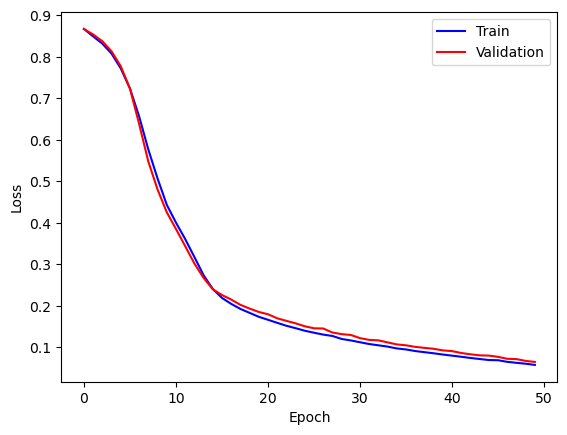

In [11]:
plt.plot(history.history['loss'], color='blue', label='Train')
plt.plot(history.history['val_loss'], color='red', label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Get threshold

In [12]:
yhat_train = model.predict(data_train)

mae_train = np.mean(np.abs(yhat_train - data_train), axis=1)

mae_train.shape

32/32 [==============================] - 0s 790us/step


(1000, 1)

In [13]:
threshold = max(mae_train)

threshold

array([0.22127586])

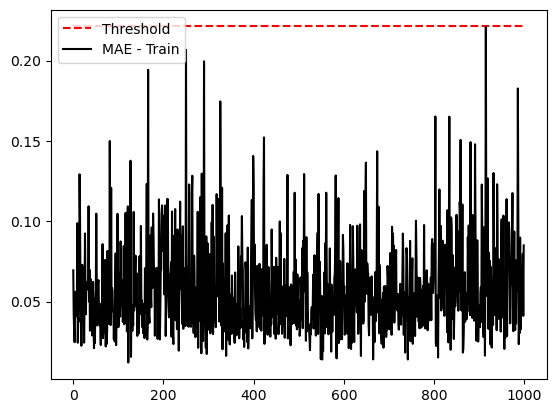

In [14]:
plt.hlines(y=threshold, xmin=0, xmax=len(mae_train), color='red', linestyles='--', label='Threshold')
plt.plot(mae_train, color='black', label='MAE - Train')
plt.legend()
plt.show()

# Visualize the result

In [15]:
yhat_test = model.predict(data_test)

mae_test = np.mean(np.abs(yhat_test - data_test), axis=1)

mae_test.shape

1/1 [==============================] - 0s 16ms/step


(20, 1)

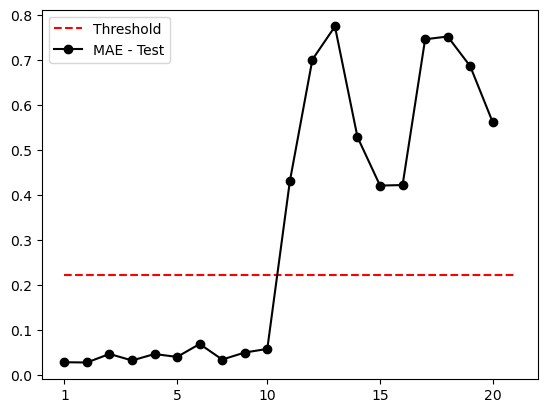

In [20]:
plt.hlines(y=threshold, xmin=0, xmax=len(mae_test), color='red', linestyles='--', label='Threshold')
plt.plot(mae_test, color='black', label='MAE - Test', marker='o')
plt.xticks([0, 5, 9, 14, 19], ['1', '5', '10', '15', '20'])
plt.legend()
plt.show()